In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import io

## Load Data

In [3]:
folder_path = "../../data/39_Training_Dataset/train_data/"
file_name = "1.txt"
data_path = folder_path + file_name
column_names = ['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']
time_data = pd.read_csv(data_path, sep=' ', names=column_names)
time_data.head()

,Ax,Ay,Az,Gx,Gy,Gz
0,0,0,0,0,0,0
1,1923,313,12,-906,321,-994
2,1929,297,-20,-833,260,-1005
3,1907,262,-26,-850,33,-1029
4,1900,247,-22,-1134,-142,-921


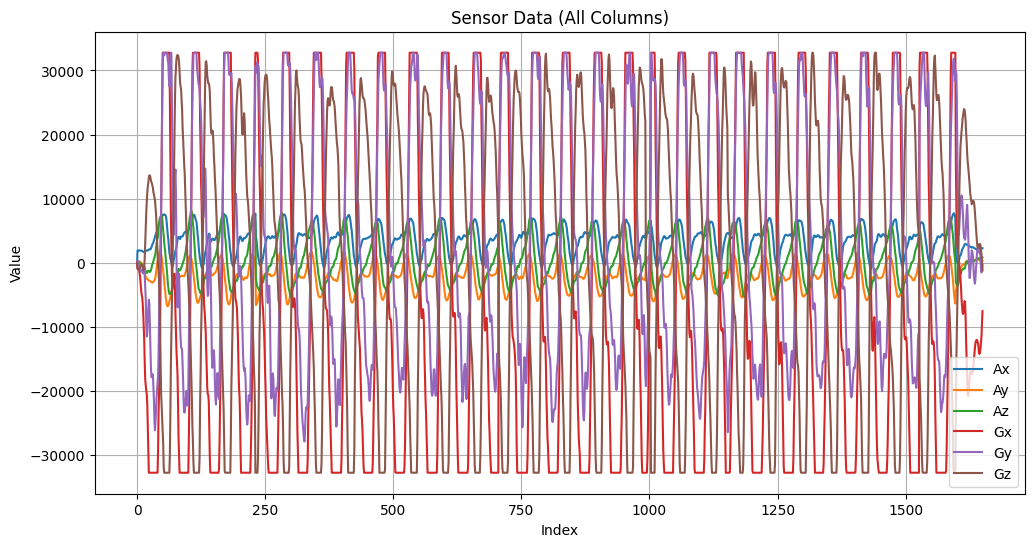

In [10]:
plt.figure(figsize=(12, 6))

# Plot each column
for column in time_data.columns:
    # Corrected line: Use the 'column' variable to select the data for this iteration
    plt.plot(time_data.index, time_data[column], linestyle='-', label=column)

# Add title and labels
plt.title('Sensor Data (All Columns)')
plt.xlabel(time_data.index.name if time_data.index.name else 'Index') # Use actual index name if available
plt.ylabel('Value')

# Add a legend to distinguish the lines
plt.legend()

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

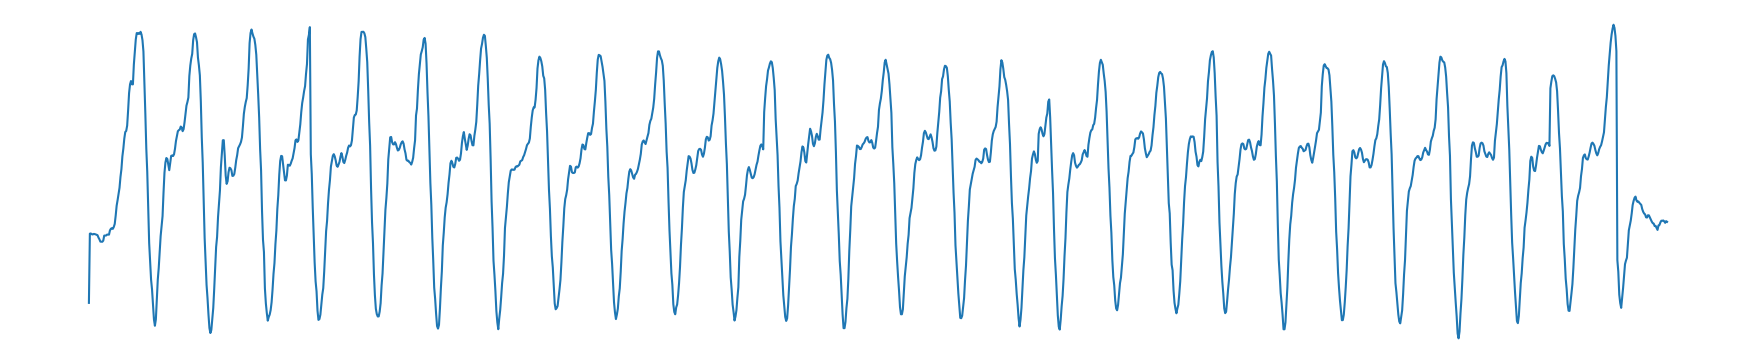

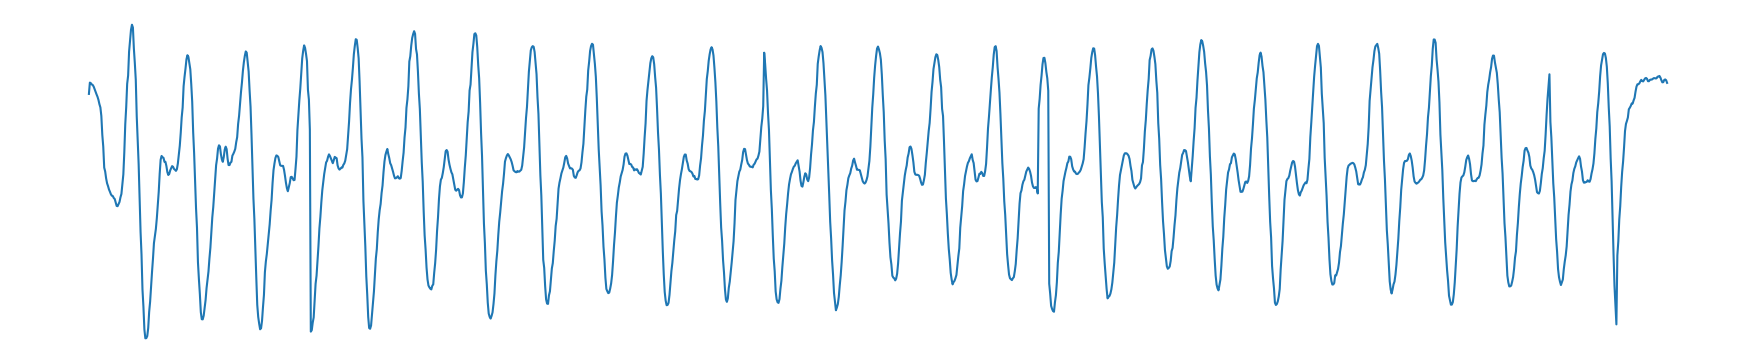

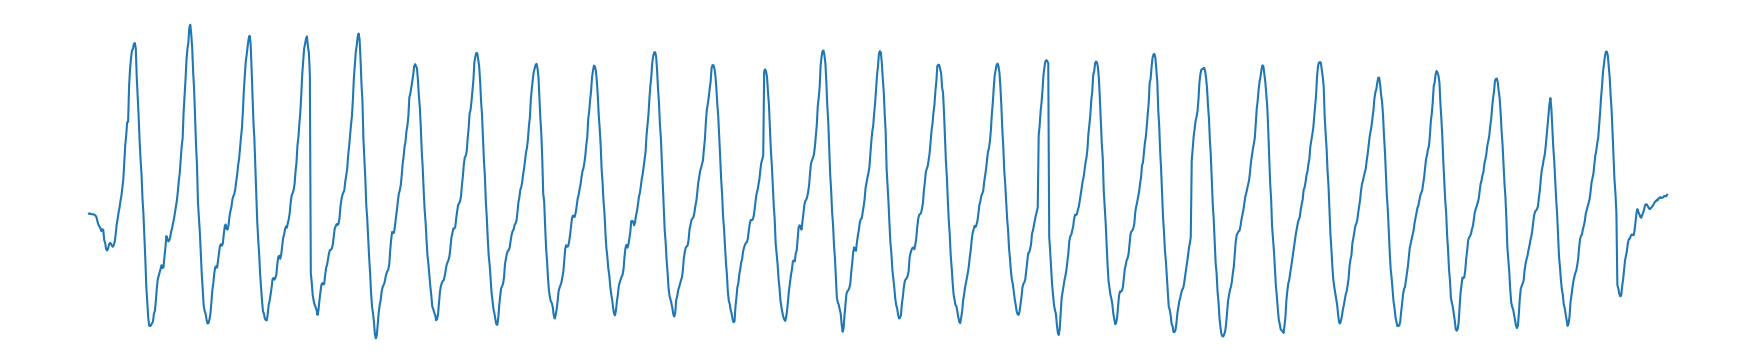

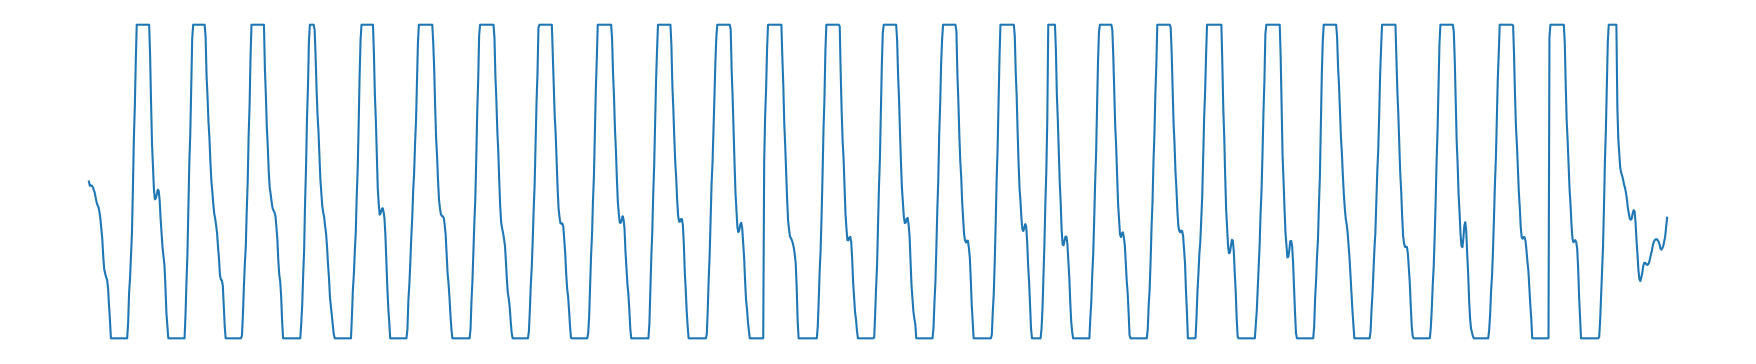

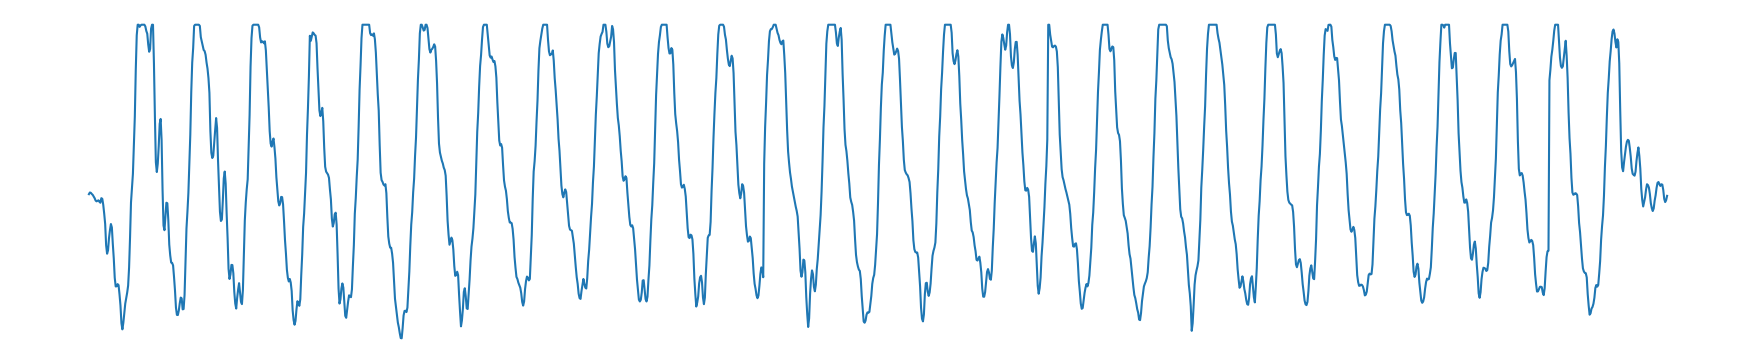

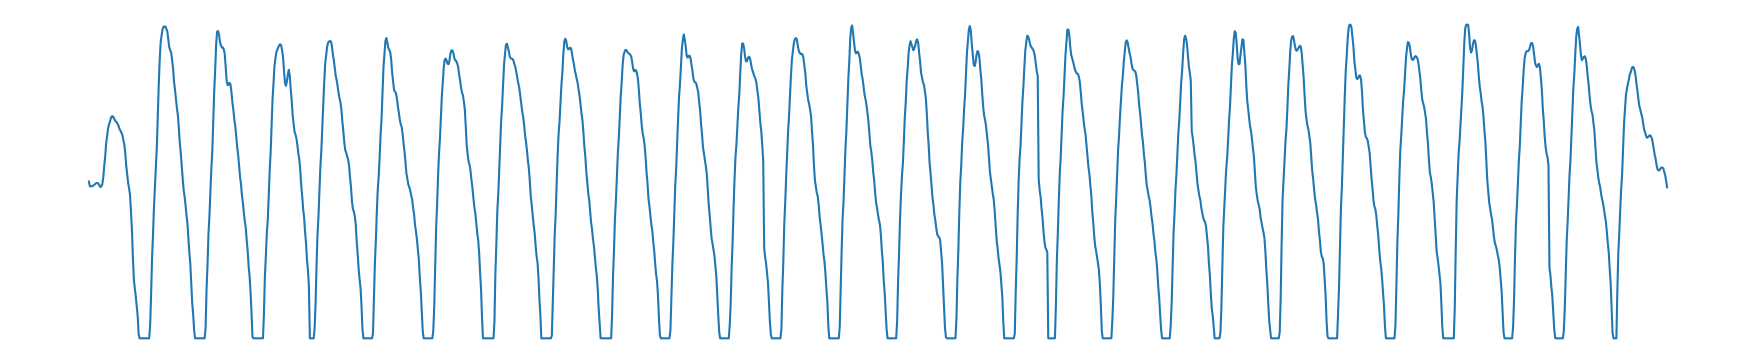

In [ ]:
target_width_pixels = 224 * 10
target_height_pixels = 224 * 2
desired_dpi = 100

# Calculate figsize in inches
fig_width_inches = target_width_pixels / desired_dpi
fig_height_inches = target_height_pixels / desired_dpi

for column in time_data.columns:
    # Create a new figure for each plot, specifying figsize in inches and DPI
    plt.figure(figsize=(fig_width_inches, fig_height_inches), dpi=desired_dpi)

    # Plot the current column
    plt.plot(time_data.index, time_data[column], linestyle='-')

    # Turn off the axis for the current plot
    plt.axis('off')

    # Optional: If you want to save the figure with these pixel dimensions
    # plt.savefig(f'{column}_plot.png', dpi=desired_dpi)
plt.show()

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
from PIL import Image
import torch

# Sample data (replace with your actual time_data if you're running this)
# If you have 'time_data' defined elsewhere, you can remove this sample data block.
if 'time_data' not in locals() and 'time_data' not in globals():
    np.random.seed(0)
    date_rng = pd.date_range(start='2020-01-01', end='2020-01-01T05:00:00', freq='H')
    data = np.random.randn(len(date_rng), 2) * 100
    time_data = pd.DataFrame(data, index=date_rng, columns=['SensorX', 'SensorY'])

target_width_pixels = 224 * 10
target_height_pixels = 224 * 2
desired_dpi = 100

# Calculate figsize in inches
fig_width_inches = target_width_pixels / desired_dpi
fig_height_inches = target_height_pixels / desired_dpi

for column in time_data.columns:
    # 1. Create a new figure
    fig = plt.figure(figsize=(fig_width_inches, fig_height_inches), dpi=desired_dpi, facecolor='white')

    # 2. Plot the current column with black lines
    plt.plot(time_data.index, time_data[column], linestyle='-', color='black')

    # 3. Turn off the axis
    plt.axis('off')

    # 4. Save the plot to a BytesIO buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png', dpi=desired_dpi, facecolor='white', bbox_inches='tight', pad_inches=0)
    buf.seek(0)

    # 5. Open the image from the buffer using Pillow
    img_pil = Image.open(buf)

    # 6. Convert the PIL image to grayscale
    # 'L' mode in Pillow is for grayscale. Pixel values are typically 0 (black) to 255 (white).
    img_gray_pil = img_pil.convert('L')

    # 7. Convert grayscale PIL image to NumPy array
    gray_array = np.array(img_gray_pil) # Shape (H, W), values 0-255

    # 8. Binarize the array: lines (dark pixels) become 1, background (light pixels) becomes 0.
    # We assume lines are black (low values) and background is white (high values).
    # A threshold around the middle (e.g., 128) or higher (e.g., 200-250) can work.
    # If a pixel value is less than the threshold, it's considered part of the line (1).
    threshold = 200 # Adjust this threshold if needed based on your plot's appearance
    binary_array = (gray_array < threshold).astype(np.uint8) # True becomes 1, False becomes 0

    # 9. Convert the binary NumPy array to a PyTorch tensor
    # Add a channel dimension: (H, W) -> (1, H, W) as PyTorch expects channels first for 2D images.
    # Using .float() as it's a common practice for tensors that might be used in models,
    # though torch.uint8 or torch.bool would also represent 0/1.
    binary_tensor = torch.from_numpy(binary_array).unsqueeze(0).float()

    print(f"\n--- Plot for {column} ---")
    print(f"Pillow grayscale image size: {img_gray_pil.size}")
    print(f"NumPy grayscale array shape: {gray_array.shape}, min: {gray_array.min()}, max: {gray_array.max()}")
    print(f"NumPy binary array shape: {binary_array.shape}, unique values: {np.unique(binary_array)}")
    print(f"PyTorch binary tensor shape: {binary_tensor.shape}")
    print(f"PyTorch binary tensor dtype: {binary_tensor.dtype}")
    print(f"PyTorch binary tensor unique values: {torch.unique(binary_tensor)}")
    # print("Sample of tensor (first 5x5 of the channel):\n", binary_tensor[0, :5, :5])

    # 10. Close the buffer and the plot
    buf.close()
    plt.close(fig)

print("\nFinished processing all columns.")


--- Plot for Ax ---
Pillow grayscale image size: (1736, 344)
NumPy grayscale array shape: (344, 1736), min: 0, max: 255
NumPy binary array shape: (344, 1736), unique values: [0 1]
PyTorch binary tensor shape: torch.Size([1, 344, 1736])
PyTorch binary tensor dtype: torch.float32
PyTorch binary tensor unique values: tensor([0., 1.])

--- Plot for Ay ---
Pillow grayscale image size: (1736, 344)
NumPy grayscale array shape: (344, 1736), min: 0, max: 255
NumPy binary array shape: (344, 1736), unique values: [0 1]
PyTorch binary tensor shape: torch.Size([1, 344, 1736])
PyTorch binary tensor dtype: torch.float32
PyTorch binary tensor unique values: tensor([0., 1.])

--- Plot for Az ---
Pillow grayscale image size: (1736, 344)
NumPy grayscale array shape: (344, 1736), min: 0, max: 255
NumPy binary array shape: (344, 1736), unique values: [0 1]
PyTorch binary tensor shape: torch.Size([1, 344, 1736])
PyTorch binary tensor dtype: torch.float32
PyTorch binary tensor unique values: tensor([0., 1.]